In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [6]:
df1=pd.read_csv("Preprocess_Bank_churners.csv",index_col=None)

df1


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.437506,-0.165406,1.059956,0.503368,-0.052637,-0.628128,-0.574182,-0.259473,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.437506,0.333570,-0.943436,2.043199,-0.597678,0.727306,0.755053,-0.259473,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.437506,0.583058,1.059956,0.503368,-0.597678,-0.628128,0.090436,-0.259473,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,0.437506,-0.789126,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.259473,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,0.437506,-0.789126,1.059956,0.503368,1.037447,-0.628128,-0.574182,-0.259473,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.437506,0.458314,1.059956,-0.266547,-0.597678,0.727306,-1.238799,-0.259473,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,-2.285681,-0.664382,1.059956,-0.266547,1.582489,-1.983561,-1.238799,-0.259473,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,-2.285681,-0.290150,-0.943436,-1.036462,-0.052637,-0.628128,0.755053,-0.259473,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,-2.285681,-2.036565,1.059956,-0.266547,-0.597678,2.082739,-1.238799,-0.259473,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


In [7]:

## Read data
df1 = pd.read_csv("Preprocess_Bank_churners.csv", index_col=None)

# Convert Attrition_Flag to binary if it's continuous 
y = np.where(df1['Attrition_Flag'] > 0, 1, 0)  # Assuming Attrition_Flag > 0 represents "Attrition", else "No Attrition"
X = df1.drop(columns=['Attrition_Flag'])

# Split data into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variance Threshold
print("\nFeature Selection: Variance Threshold")
selector = VarianceThreshold(threshold=0.1)  # Adjust threshold if needed
X_var_thresh = selector.fit_transform(X_train)
selected_features_var = X.columns[selector.get_support()]
print("Selected Features:", selected_features_var.tolist())

# Transform X to be non-negative for Chi-Square test
scaler = MinMaxScaler()
X_train_non_negative = scaler.fit_transform(X_train)

# SelectKBest with Chi-Square
print("\nFeature Selection: SelectKBest with Chi-Square")
kbest = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_train_kbest = kbest.fit_transform(X_train_non_negative, y_train)
selected_features_kbest = X.columns[kbest.get_support()]
print("Selected Features:", selected_features_kbest.tolist())

# Recursive Feature Elimination (RFE)
print("\nFeature Selection: Recursive Feature Elimination (RFE)")
logreg = LogisticRegression(max_iter=1000, random_state=0)
rfe = RFE(estimator=logreg, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = X.columns[rfe.get_support()]
print("Selected Features:", selected_features_rfe.tolist())

# Tree-based Feature Importance
print("\nFeature Selection: Tree-based Feature Importance")
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")



Feature Selection: Variance Threshold
Selected Features: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Feature Selection: SelectKBest with Chi-Square
Selected Features: ['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

Feature Selection: Recursive Feature Elimination (RFE)
Selected Features: ['Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

Feature Selection: Tree-based Feature Importance
Feature Importances:
Total_Trans_Amt: 0.195014649573337
Total_Trans_Ct: 0.17174684680060076
Total_Revolving_Bal: 0.10895223101296972
Total_Ct


Dimensionality Reduction: PCA
Explained Variance Ratio of PCA Components: [0.16354042 0.11124679 0.09481218 0.08213799 0.06824508]


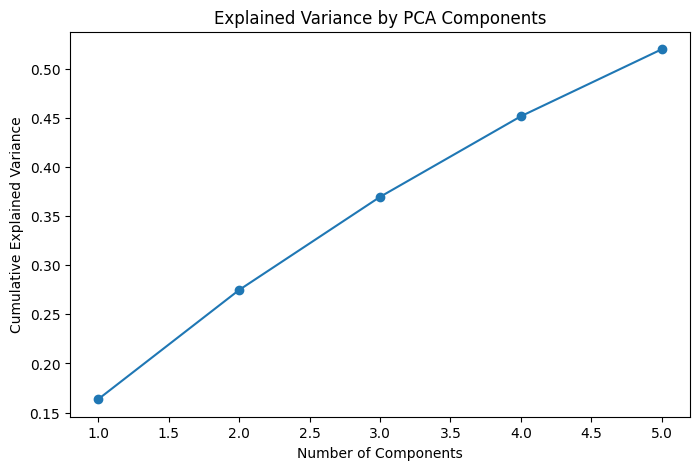

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
print("\nDimensionality Reduction: PCA")

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=5)  # Adjust number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)

# Explained Variance
print("Explained Variance Ratio of PCA Components:", pca.explained_variance_ratio_)

# Plotting explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



Dimensionality Reduction: Kernel PCA


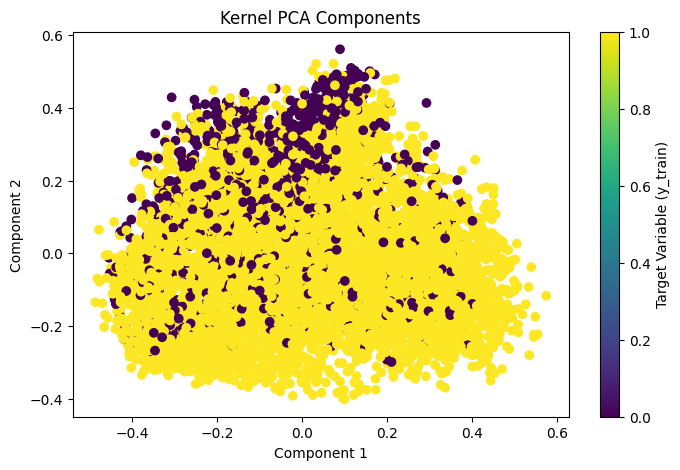

In [11]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Apply Kernel PCA with RBF kernel
print("\nDimensionality Reduction: Kernel PCA")

kpca = KernelPCA(kernel="rbf", n_components=5)  # You can change kernel type (e.g., "linear", "poly", etc.)
X_train_kpca = kpca.fit_transform(X_train_scaled)

# Plotting the first two components of the KPCA transformed data
plt.figure(figsize=(8, 5))
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.title('Kernel PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Target Variable (y_train)')
plt.show()


Number of classes: 2
Using 1 components for LDA.
Explained Variance Ratio of LDA Components: [1.]


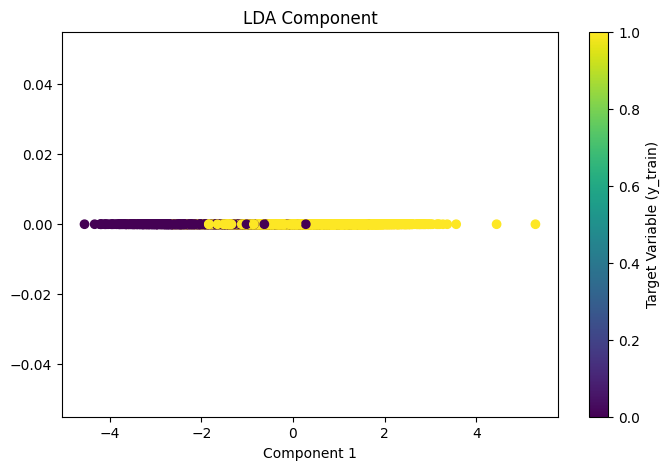

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

# Check number of classes in the target variable
n_classes = len(np.unique(y_train))  # Use np.unique for numpy arrays
print(f"Number of classes: {n_classes}")

# Apply LDA with the appropriate number of components
max_components = min(X_train_scaled.shape[1], n_classes - 1)
print(f"Using {max_components} components for LDA.")

lda = LinearDiscriminantAnalysis(n_components=max_components)  
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

# Explained variance ratio in LDA
print("Explained Variance Ratio of LDA Components:", lda.explained_variance_ratio_)

# If there is only one component, we cannot plot it against another component, so we need to adjust
if max_components > 1:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis')
    plt.title('LDA Components')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Target Variable (y_train)')
else:
    # Plotting just the single LDA component
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train_lda[:, 0], np.zeros_like(X_train_lda[:, 0]), c=y_train, cmap='viridis')
    plt.title('LDA Component')
    plt.xlabel('Component 1')
    plt.colorbar(label='Target Variable (y_train)')

plt.show()
